In [1]:
# Importing required modues
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distributions
m = 0
sd = 1
dist_n = np.random.normal(m, sd, 1000)


n1 = 1 
p1 = 0.5
n2 = 2
p2 = 0.7
n3 = 10
p3 = 0.9
dist_b1 = np.random.binomial(n1, p1 , 1000)
dist_b2 = np.random.binomial(n2, p2 , 1000)
dist_b3 = np.random.binomial(n3, p3 , 1000)

In [3]:
# Printing the results for kstest and anderson test on 1st binomial sample generated on 
# normal distribution
print "binomial1 on normal", scipy.stats.kstest(dist_b1,'norm')
print "binomial1 on normal", scipy.stats.anderson(dist_b1, dist='norm')

binomial1 on normal (0.5, 0.0)
binomial1 on normal (179.57206332447004, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [4]:
# Printing the results for kstest and anderson test on 2nd binomial sample generated on 
# normal distributionprint "binomial2 on normal", scipy.stats.kstest(dist_b2,'norm')
print "binomial2 on normal", scipy.stats.kstest(dist_b2,'norm')
print "binomial2 on normal", scipy.stats.anderson(dist_b2, dist='norm')

binomial2 on normal (0.75534474606854296, 0.0)
binomial2 on normal (111.47119127438145, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [5]:
# Printing the results for kstest and anderson test on 3rd binomial sample generated on 
# normal distributionprint "binomial3 on normal", scipy.stats.kstest(dist_b3,'norm')
print "binomial3 on normal", scipy.stats.kstest(dist_b3,'norm')
print "binomial3 on normal", scipy.stats.anderson(dist_b3, dist='norm')

binomial3 on normal (0.99996832875816688, 0.0)
binomial3 on normal (61.734496309994483, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


For all three cases, the use of the KS test shows a low p-value and statistic; since the null hypotesis in this case is that the two groups compared are sampled for the same distribution (in this case a normal distribution) with the same mean and standard deviation, we can interpret in all three cases (even with different levels of p and n values in the binomial) that the null hypotesis is rejected, and confirming that all three compared groups came from different distributions. 

In the same way that the KS test, the anderson test null hypotesis is that the group compared to the desired distribution comes from that distribution: since in all cases we see a ver high value of the anderson statistic that exceeds the values from the desired siginificance value (0.5), we reject this null hypotesis and confirm that in all cases the groups sampled came from a different distribution.

In [6]:
# fitting values of all binomial generated samples into a normal distribution 
# to run KL test
distpdf_b1, mybins_b1, = np.histogram(dist_b1, density=True)
distpdf_b2, mybins_b2, = np.histogram(dist_b2, density=True)
distpdf_b3, mybins_b3, = np.histogram(dist_b3, density=True)

In [7]:
# fitting values of all binomial generated samples into a normal distribution 
# to run KL test
bincenters_b1 = mybins_b1[:-1] + 0.5*(mybins_b1[1] - mybins_b1[0])
bincenters_b2 = mybins_b2[:-1] + 0.5*(mybins_b2[1] - mybins_b2[0])
bincenters_b3 = mybins_b3[:-1] + 0.5*(mybins_b3[1] - mybins_b3[0])

In [8]:
# Printing values of KL test of all binomial generated samples into a normal distribution 
print "binomial1 on normal", scipy.stats.entropy(distpdf_b1, scipy.stats.norm.pdf(bincenters_b1))
print "binomial2 on normal", scipy.stats.entropy(distpdf_b2, scipy.stats.norm.pdf(bincenters_b2))
print "binomial3 on normal", scipy.stats.entropy(distpdf_b3, scipy.stats.norm.pdf(bincenters_b3))

binomial1 on normal 1.68475962543
binomial2 on normal 1.99157663373
binomial3 on normal 30.0624730541


Due to the large value of the KL statistic for all three cases, we can reject the null hypotesis and confirm that all three samples do  not come from a normal distribution.

In [9]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

In [10]:
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

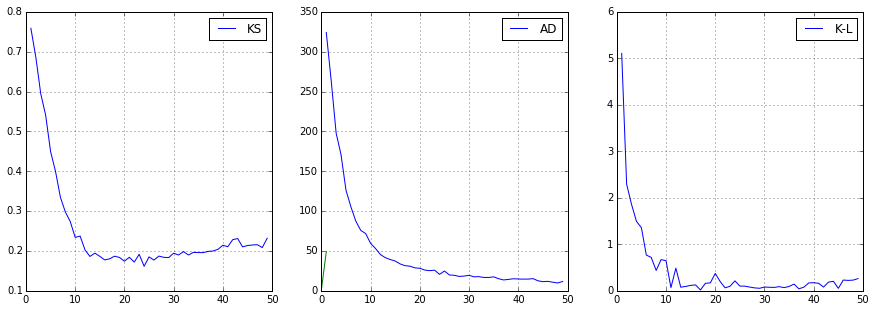

In [11]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()
pl.grid()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]])
pl.plot()
pl.plot()
pl.legend()
pl.grid()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.legend()
pl.grid()

For all three graphs, what the line is showing us is that the binomial sample tends to have lower values of all three statistics (KS, Anderson and KL) as the n parameter of the sample (number of observations of each sample) increases over time; this ultimatelly confirms the validity of the central limit theorem, showing that for any given distribution on a large number of observations that distribution will tend to behave like a gaussian (normal) distribution. 

In [16]:
#generate the distributions
m = 0
sd = 1
dist_n = np.random.normal(m, sd, 1000)


l1 = 1 
l2 = 5
l3 = 20
dist_p1 = np.random.poisson(l1 , 1000)
dist_p2 = np.random.poisson(l2 , 1000)
dist_p3 = np.random.poisson(l3 , 1000)

In [18]:
# Printing the results for kstest and anderson test on 1st binomial sample generated on 
# normal distribution
print "Poisson1 on normal", scipy.stats.kstest(dist_p1,'norm')
print "Poisson1 on normal", scipy.stats.anderson(dist_p1, dist='norm')

Poisson1 on normal (0.5, 0.0)
Poisson1 on normal (59.281177035728206, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [19]:
# Printing the results for kstest and anderson test on 1st binomial sample generated on 
# normal distribution
print "Poisson2 on normal", scipy.stats.kstest(dist_p2,'norm')
print "Poisson2 on normal", scipy.stats.anderson(dist_p2, dist='norm')

Poisson2 on normal (0.93824986805182076, 0.0)
Poisson2 on normal (11.082518638134161, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [20]:
# Printing the results for kstest and anderson test on 1st binomial sample generated on 
# normal distribution
print "Poisson3 on normal", scipy.stats.kstest(dist_p3,'norm')
print "Poisson3 on normal", scipy.stats.anderson(dist_p3, dist='norm')

Poisson3 on normal (0.99999999999999933, 0.0)
Poisson3 on normal (2.4540803331703955, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


For all three cases, the use of the KS test shows a low p-value and statistic; since the null hypotesis in this case is that the two groups compared are sampled for the same distribution (in this case a normal distribution) with the same mean and standard deviation, we can interpret in all three cases (even with different levels of lambda in the poisson) that the null hypotesis is rejected, and confirming that all three compared groups came from different distributions.

In the same way that the KS test, the anderson test null hypotesis is that the group compared to the desired distribution comes from that distribution: since in all cases we see a ver high value of the anderson statistic that exceeds the values from the desired siginificance value (0.5), we reject this null hypotesis and confirm that in all cases the groups sampled came from a different distribution.

In [21]:
# fitting values of all binomial generated samples into a normal distribution 
# to run KL test
distpdf_p1, mybins_p1, = np.histogram(dist_p1, density=True)
distpdf_p2, mybins_p2, = np.histogram(dist_p2, density=True)
distpdf_p3, mybins_p3, = np.histogram(dist_p3, density=True)

In [22]:
# fitting values of all binomial generated samples into a normal distribution 
# to run KL test
bincenters_p1 = mybins_p1[:-1] + 0.5*(mybins_p1[1] - mybins_p1[0])
bincenters_p2 = mybins_p2[:-1] + 0.5*(mybins_p2[1] - mybins_p2[0])
bincenters_p3 = mybins_p3[:-1] + 0.5*(mybins_p3[1] - mybins_p3[0])

In [23]:
# Printing values of KL test of all binomial generated samples into a normal distribution 
print "Poisson1 on normal", scipy.stats.entropy(distpdf_p1, scipy.stats.norm.pdf(bincenters_p1))
print "Poisson2 on normal", scipy.stats.entropy(distpdf_p2, scipy.stats.norm.pdf(bincenters_p2))
print "Poisson3 on normal", scipy.stats.entropy(distpdf_p3, scipy.stats.norm.pdf(bincenters_p3))

Poisson1 on normal 0.473746565058
Poisson2 on normal 14.3270793085
Poisson3 on normal 162.103229928


Due to the large value of the KL statistic for all three cases, we can reject the null hypotesis and confirm that all three samples do not come from a normal distribution.

In [26]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

In [27]:
for i,n in enumerate(narray):
    l = 10
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n, scale=n))

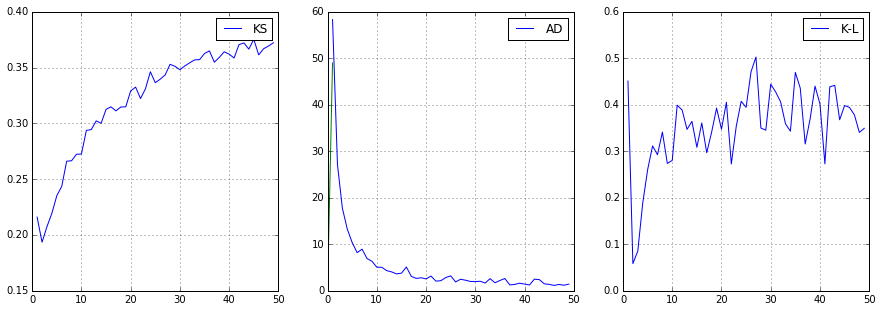

In [28]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()
pl.grid()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]])
pl.plot()
pl.plot()
pl.legend()
pl.grid()


fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.legend()
pl.grid()

For this case, since the poisson parameter used by python scipy module is lambda (the mean and variance of the distribution), we can see in the three graphics disparate results; however we can interpret that the value of all three statistics for all three test fluctuate as the value of lambda increases; in the case of the KS test it seems to increase as lambda increases, and for the AD test, the value decreases as lambda increases. Anyway, we can still interpet from this results that as with the binomial distribution a increase value in lambda makes the poisson behave like a gaussian (normal) distribution, aligining with the central limith theorem.